# TD11 : Arbres de décision

## 1. Arbres de décision

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import seaborn as sns

In [4]:
toy2 = pd.read_csv('data/toy2.csv')
toy2_X = toy2.drop('y', axis=1)
toy2_y = toy2['y']
toy2.head()

,X1,X2,y
0,1.5,0.5,0
1,3.0,1.0,0
2,3.5,2.0,0
3,2.5,2.5,0
4,4.5,1.5,0


[Text(0.4444444444444444, 0.9, 'X1 <= 2.75\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = 0'),
 Text(0.2222222222222222, 0.7, 'X2 <= 1.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = 1'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.5, 'X1 <= 2.25\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = 1'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.4444444444444444, 0.3, 'X2 <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.6666666666666666, 0.7, 'X2 <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.7777777777777778, 0.5, 'X1 <= 3.75\ngini = 0.444\nsamples = 3\nval

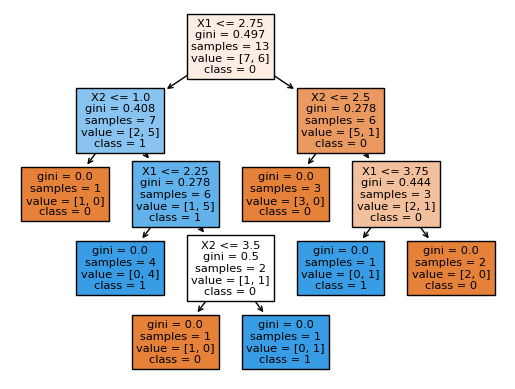

In [5]:
arbre = DecisionTreeClassifier()
arbre.fit(toy2_X, toy2_y)

plot_tree(arbre, feature_names=toy2_X.columns, class_names=['0', '1'], filled=True)


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


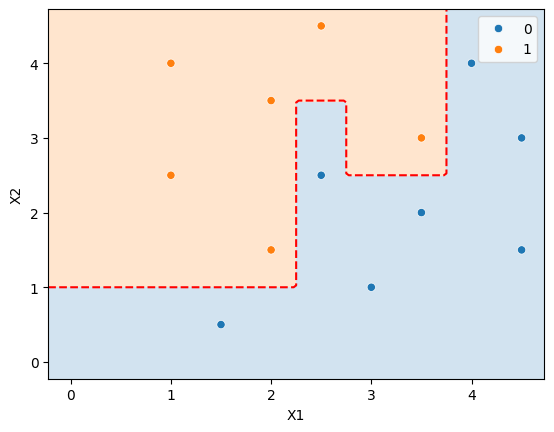

In [11]:
from src.utils import *

sns.scatterplot(data=toy2, x='X1', y='X2', hue='y')
add_decision_boundary(arbre)

In [8]:
# Critère de Gini de la racine
proportions = toy2_y.value_counts(normalize=True)
gini = 1 - (proportions**2).sum()

# Ou avec la formule du cours
gini = (proportions[0] * (proportions[1])) + (proportions[1] * proportions[0])

0.4970414201183432
0.4970414201183432


In [9]:
# Gain avec la première séparation

gini_racine = arbre.tree_.impurity[0]
nb_racine = arbre.tree_.n_node_samples[0]

fils_gauche = arbre.tree_.children_left[0]
fils_droit = arbre.tree_.children_right[0]

gini_gauche = arbre.tree_.impurity[fils_gauche]
gini_droit = arbre.tree_.impurity[fils_droit]

nb_gauche = arbre.tree_.n_node_samples[fils_gauche]
nb_droit = arbre.tree_.n_node_samples[fils_droit]

gain = nb_racine * gini_racine - nb_gauche * gini_gauche - nb_droit * gini_droit
gain

1.9377289377289377

In [14]:
from sklearn.utils import resample

synth1 = pd.read_csv('data/Synth1-2000.csv')
synth1_X = synth1.drop('y', axis=1)
synth1_y = synth1['y']

In [17]:
# Create 3 resamples of the dataset
s1 = resample(synth1, n_samples=2000, replace=True)
s2 = resample(synth1, n_samples=2000, replace=True)
s3 = resample(synth1, n_samples=2000, replace=True)

datasets = [s1, s2, s3]

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


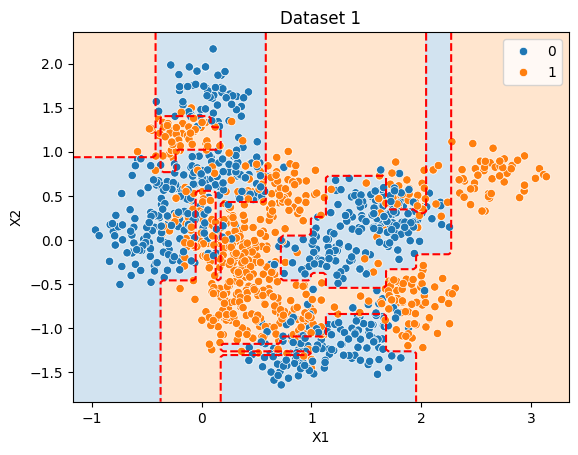

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


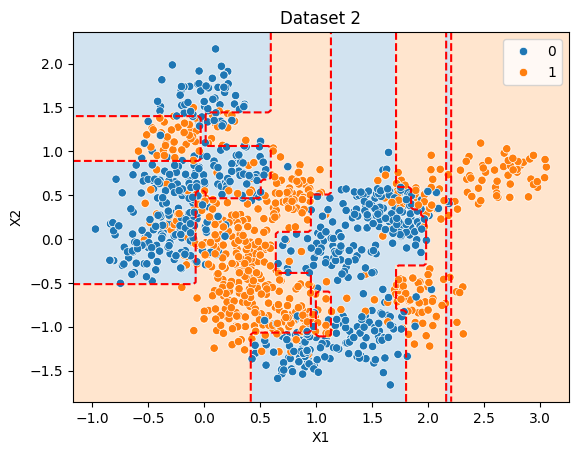

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


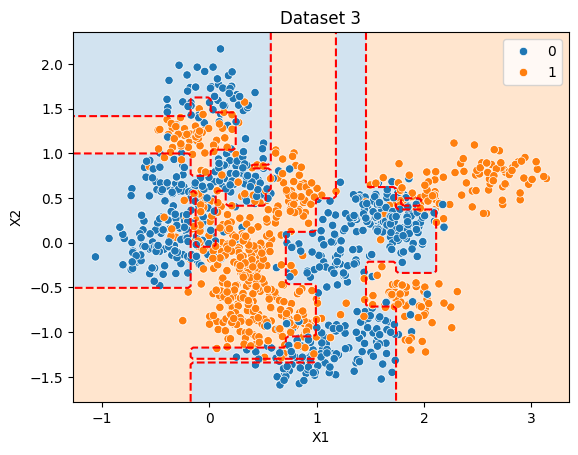

In [21]:
arbres = []
for i, d in enumerate(datasets):
    arbre = DecisionTreeClassifier(max_leaf_nodes=50)
    arbre.fit(d.drop('y', axis=1), d['y'])
    arbres.append(arbre)
    sns.scatterplot(data=d, x='X1', y='X2', hue='y')
    add_decision_boundary(arbre)
    plt.title(f"Dataset {i+1}")
    plt.show()

In [24]:
def aggregating(X):
    y1 = arbres[0].predict(X)
    y2 = arbres[1].predict(X)
    y3 = arbres[2].predict(X)

    return np.where((y1 + y2 + y3) >= 1.5, 1, 0)

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


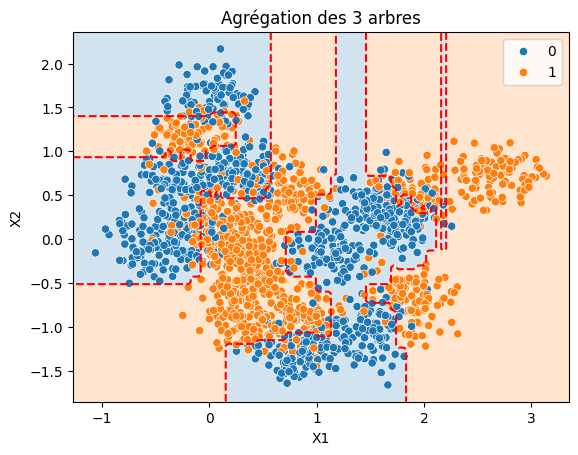

In [25]:
sns.scatterplot(data=synth1, x='X1', y='X2', hue='y')
add_decision_boundary(aggregating, model_classes=[0, 1])
plt.title("Agrégation des 3 arbres")
plt.show()

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


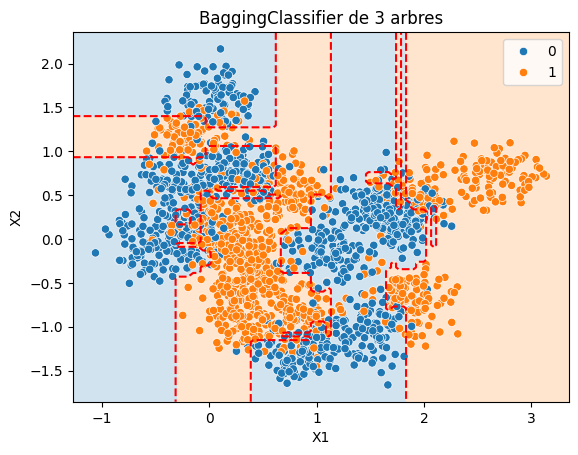

In [27]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=50), n_estimators=3)
bagging.fit(synth1_X, synth1_y)

sns.scatterplot(data=synth1, x='X1', y='X2', hue='y')
add_decision_boundary(bagging)
plt.title("BaggingClassifier de 3 arbres")
plt.show()

## 2.2 Forêt aléatoire

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


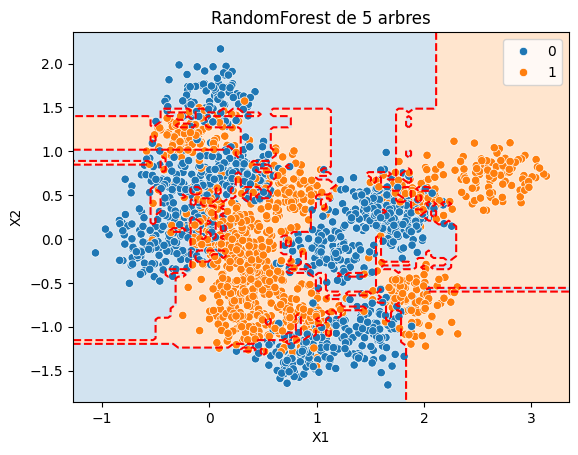

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, max_features=int(np.sqrt(synth1_X.shape[1])))
rf.fit(synth1_X, synth1_y)

sns.scatterplot(data=synth1, x='X1', y='X2', hue='y')
add_decision_boundary(rf)
plt.title("RandomForest de 5 arbres")
plt.show()

## 2.3 Elagage coût-complexité et validation croisée